In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [3]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

In [4]:
df = pd.read_csv('/kaggle/input/housedata/data.csv')

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df["country"].unique()

array(['USA'], dtype=object)

In [8]:
df["city"].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [9]:
frequency_distribution = df['city'].value_counts()

# Displaying the frequency distribution
print(frequency_distribution)

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

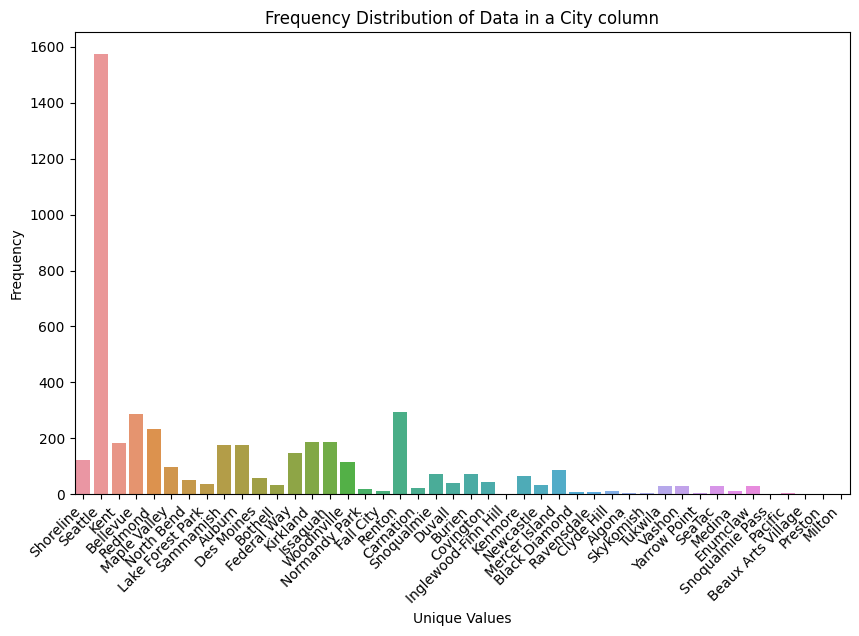

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the frequency distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='city', data=df)
plt.title('Frequency Distribution of Data in a City column')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
df = df.drop(['street', 'statezip', 'date'], axis =1)

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,Shoreline,USA
1,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,Seattle,USA
2,342000.00,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,Kent,USA
3,420000.00,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,Bellevue,USA
4,550000.00,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,Redmond,USA


In [13]:
column_name = 'view'

# Check if values in the column are '0' or not
is_zero = df[column_name] == 0

# Display the rows where the values are '0'
print("Rows where values are '0':")
print(df[is_zero])

# Display the rows where the values are not '0'
print("\nRows where values are not '0':")
print(df[~is_zero])

Rows where values are '0':
         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0    313000.00      3.00       1.50         1340      7912    1.50   
2    342000.00      3.00       2.00         1930     11947    1.00   
3    420000.00      3.00       2.25         2000      8030    1.00   
4    550000.00      4.00       2.50         1940     10500    1.00   
5    490000.00      2.00       1.00          880      6380    1.00   
...        ...       ...        ...          ...       ...     ...   
4595 308166.67      3.00       1.75         1510      6360    1.00   
4596 534333.33      3.00       2.50         1460      7573    2.00   
4597 416904.17      3.00       2.50         3010      7014    2.00   
4598 203400.00      4.00       2.00         2090      6630    1.00   
4599 220600.00      3.00       2.50         1490      8102    2.00   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3        1340             

In [14]:
# Convert '0' values to NaN
df['sqft_basement'].replace('0', pd.NA, inplace=True)

# Convert the column to numeric (assuming it contains numbers)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

# Calculate the mean of non-NaN values
mean_value = df['sqft_basement'].mean()

# Replace NaN values with the mean
df['sqft_basement'].fillna(mean_value, inplace=True)

# Display the updated DataFrame
print(df)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     313000.00      3.00       1.50         1340      7912    1.50   
1    2384000.00      5.00       2.50         3650      9050    2.00   
2     342000.00      3.00       2.00         1930     11947    1.00   
3     420000.00      3.00       2.25         2000      8030    1.00   
4     550000.00      4.00       2.50         1940     10500    1.00   
...         ...       ...        ...          ...       ...     ...   
4595  308166.67      3.00       1.75         1510      6360    1.00   
4596  534333.33      3.00       2.50         1460      7573    2.00   
4597  416904.17      3.00       2.50         3010      7014    2.00   
4598  203400.00      4.00       2.00         2090      6630    1.00   
4599  220600.00      3.00       2.50         1490      8102    2.00   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3        1340              0      1955   

In [15]:
df['sqft_basement'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4600 entries, 0 to 4599
Series name: sqft_basement
Non-Null Count  Dtype
--------------  -----
4600 non-null   int64
dtypes: int64(1)
memory usage: 36.1 KB


In [16]:
df['sqft_basement'].describe()

count   4600.00
mean     312.08
std      464.14
min        0.00
25%        0.00
50%        0.00
75%      610.00
max     4820.00
Name: sqft_basement, dtype: float64

In [17]:
df['sqft_basement'].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Name: sqft_basement, Length: 4600, dtype: bool>

In [18]:
df['sqft_basement'].head()

0       0
1     280
2       0
3    1000
4     800
Name: sqft_basement, dtype: int64